In [1]:
from zipfile import ZipFile 
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import matplotlib
import copy
import math
import seaborn as sns
import math as mth
from sklearn.cluster import KMeans

In [2]:
#Set up function for saving dataframes dynamically by year
dict_of_df = {}
def name_df(df,year):
    key_name = 'df_'+str(year)
    dict_of_df[key_name] = copy.deepcopy(df)

In [3]:
#Open each file, save to dataframe, format if needed, then save to one dataframe dictionary
for x in range(1,22):
    y=97+x
    z=1997+x
    if y >=100:
        num=y-100
    else:
        num=y
    numstr='%02d' % (num)
    if z<=2002:
        file="state_"+str(z)+"_dl.xls" #format for 98-02
    elif z<=2006:
        file="state_may"+str(z)+"_dl.xls" #format for 03-06
    elif z==2007:
        file="state_May"+str(z)+"_dl.xls" #format for 07
    elif z==2008:
        file="state__M"+str(z)+"_dl.xls" #format for 08
    elif z==2009:
        file="state_dl.xls" #format for 09
    elif z<=2013:
        file="state_M"+str(z)+"_dl.xls" #format for 10-13
    else:
        file=r"C:\Users\Anna\Documents\Career\DataProjects\Labor\unzipped_data\oesm"+numstr+"st\state_M"+str(z)+"_dl.xlsx" #format for 14-18
    df = pd.read_excel(file) #save file to data frame
    
    if y<=100:
        #Re-format for 1998-2000 (don't need to do this for any others)
        df = df[pd.notnull(df['Unnamed: 0'])] #drop all that have null value in the unnamed 0 column
        df.columns=df.iloc[0] #set the column labels to be the first row
        df=df.reset_index() #reset the index
        df=df.drop("index", axis=1) #remove old index
        df=df.drop([0], axis=0) #drop first row which is just column labels
    df['date']=datetime.strptime('5/1/'+str(z), '%m/%d/%Y')
    df.columns = map(str.lower, df.columns) #lower case all col headers
    print(file)
    name_df(df,z)

state_1998_dl.xls
state_1999_dl.xls
state_2000_dl.xls
state_2001_dl.xls
state_2002_dl.xls
state_may2003_dl.xls
state_may2004_dl.xls
state_may2005_dl.xls
state_may2006_dl.xls
state_May2007_dl.xls
state__M2008_dl.xls
state_dl.xls
state_M2010_dl.xls
state_M2011_dl.xls
state_M2012_dl.xls
state_M2013_dl.xls
C:\Users\Anna\Documents\Career\DataProjects\Labor\unzipped_data\oesm14st\state_M2014_dl.xlsx
C:\Users\Anna\Documents\Career\DataProjects\Labor\unzipped_data\oesm15st\state_M2015_dl.xlsx
C:\Users\Anna\Documents\Career\DataProjects\Labor\unzipped_data\oesm16st\state_M2016_dl.xlsx
C:\Users\Anna\Documents\Career\DataProjects\Labor\unzipped_data\oesm17st\state_M2017_dl.xlsx
C:\Users\Anna\Documents\Career\DataProjects\Labor\unzipped_data\oesm18st\state_M2018_dl.xlsx


In [4]:
# Check to make sure all years were saved into DataFrame
dict_of_df.keys()

dict_keys(['df_1998', 'df_1999', 'df_2000', 'df_2001', 'df_2002', 'df_2003', 'df_2004', 'df_2005', 'df_2006', 'df_2007', 'df_2008', 'df_2009', 'df_2010', 'df_2011', 'df_2012', 'df_2013', 'df_2014', 'df_2015', 'df_2016', 'df_2017', 'df_2018'])

In [5]:
# Define function for changing data types to make sure all DF columns are of the same type
# Converts strings to either ints or floats
def change_type(dftest, dftest2): #Takes 2 DFs 
    
    #First clean-up all of the NaNs, symbols, and other unwanted entries -> change to 99999
    dftest=dftest.replace([np.nan,"#","~","*","**","***","no","release"], [99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999])
    dftest2=dftest2.replace([np.nan,"#","~","*","**","***","no","release"], [99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999])
    
    for x in dftest.columns: #Loops throught the columns of the first DF
        if x in dftest2.columns: #If column in second DF

            if dftest.dtypes[x] != dftest2.dtypes[x]: #If the types are not the same
                if dftest.dtypes[x]==np.object and (dftest2.dtypes[x]==np.int32 or dftest2.dtypes[x]==np.int64):
                    dftest=dftest.astype({x: 'int32'})
                elif dftest.dtypes[x]==np.object and dftest2.dtypes[x]==np.float:
                    dftest=dftest.astype({x: 'float'})
                elif dftest2.dtypes[x]==np.object and (dftest.dtypes[x]==np.int32 or dftest.dtypes[x]==np.int64):
                    dftest2=dftest2.astype({x: 'int32'})
                elif dftest2.dtypes[x]==np.object and dftest.dtypes[x]==np.float:
                    dftest2=dftest2.astype({x: 'float'})
    return dftest, dftest2

In [6]:
#Compile DataFrames into one DataFrame

count=0 #Counter for the DF loop

for key in dict_of_df: #Loop through each DF
    count=count+1 #Count the number of DFs we have looped through
    df=dict_of_df[key] #Get DF
        
    for col_name in df.columns: #rename columns so they are all the same
        df=df.rename(columns={col_name:col_name.replace('wpct','pct')})
        df=df.rename(columns={"occ_titl": "occ_title"})
        df=df.rename(columns={"group": "occ_group"})
        
    if count==1: 
        df_all_temp=df #if first DF, start the compiled DF
    else:
        df_all_temp=df_all #if not first DF, re-name previous compiled DF as temp
    
    if count > 1: #make sure this isn't the first DataFrame
        #Change types so they are consistent across DFs
        [df_all_temp, df] = change_type(df_all_temp, df)
        col_names=df_all_temp.columns.intersection(df.columns).tolist()
        df_all=df.merge(df_all_temp,how='outer',on=col_names) #merge the DataFrames
    elif count ==1:
        df_all=df_all_temp
        
    print(key)

df_1998
df_1999
df_2000
df_2001
df_2002
df_2003
df_2004
df_2005
df_2006
df_2007
df_2008
df_2009
df_2010
df_2011
df_2012
df_2013
df_2014
df_2015
df_2016
df_2017
df_2018


In [7]:
#Clean-up: Remove all rows that have 99999 in the column h_median
df_all_cl=df_all[df_all.h_median != 99999]

In [9]:
#Clean-up: set all occupational titles to lower case
df_all_cl.occ_title=df_all_cl['occ_title'].apply(lambda x: x.lower())

In [10]:
#Check to make sure clean-up worked as intended
df_all_cl.head()

,area,st,state,occ_code,occ_title,occ_group,tot_emp,emp_prse,jobs_1000,loc_q,...,a_pct75,a_pct90,annual,hourly,date,loc quotient,year,release,one or three,year
0,1,AL,Alabama,00-0000,all occupations,total,1943760,0.4,1000.000,1.00,...,53310,79630,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN
1,1,AL,Alabama,11-0000,management occupations,major,73860,1.1,38.001,0.72,...,132860,187330,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN
2,1,AL,Alabama,11-1011,chief executives,detailed,1390,5.6,0.716,0.53,...,99999,99999,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN
3,1,AL,Alabama,11-1021,general and operations managers,detailed,28600,1.8,14.712,0.93,...,147250,99999,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN
5,1,AL,Alabama,11-2011,advertising and promotions managers,detailed,50,20.7,0.028,0.16,...,150100,167090,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN


In [11]:
#Probe data: check to see the median hourly wage in Alabama by year
df_all_cl.groupby(['state','date'])['h_median'].mean()['Alabama']

date
1998-05-01    12.776119
1999-05-01    13.977145
2000-05-01    14.756101
2001-05-01    14.966596
2002-05-01    15.560247
2003-05-01    15.818694
2004-05-01    16.628652
2005-05-01    16.938477
2006-05-01    17.537871
2007-05-01    18.029402
2008-05-01    18.593088
2009-05-01    19.037656
2010-05-01    19.579723
2011-05-01    20.285401
2012-05-01    20.513454
2013-05-01    21.108244
2014-05-01    21.336061
2015-05-01    22.102580
2016-05-01    22.353270
2017-05-01    22.643394
2018-05-01    22.954504
Name: h_median, dtype: float64

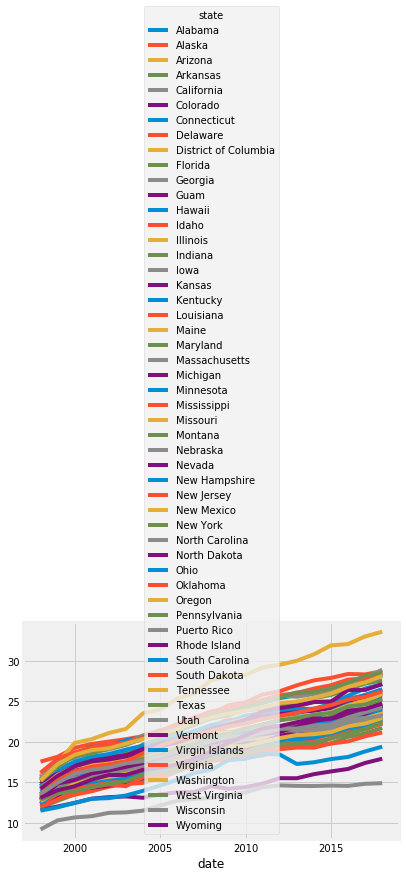

In [12]:
#Probe the data: median hourly wage for each state over time
df_all_cl.groupby(['date','state'])['h_median'].mean().unstack().plot(legend=True)

In [13]:
#Let's look at just a subset of the data
#Pick a few states to visualize
dfsub=df_all_cl[df_all_cl.state.isin(['Virginia','Pennsylvania','Alabama','District of Columbia','Puerto Rico','California','Washington'])]

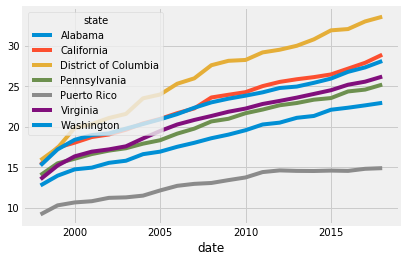

In [14]:
#Median hourly wage over time
dfsub.groupby(['date','state'])['h_median'].mean().unstack().plot(legend=True)

In [15]:
#Function to return the highest median hourly wage
def get_max_emp(group):
    return group.loc[group.h_median.idxmax()]

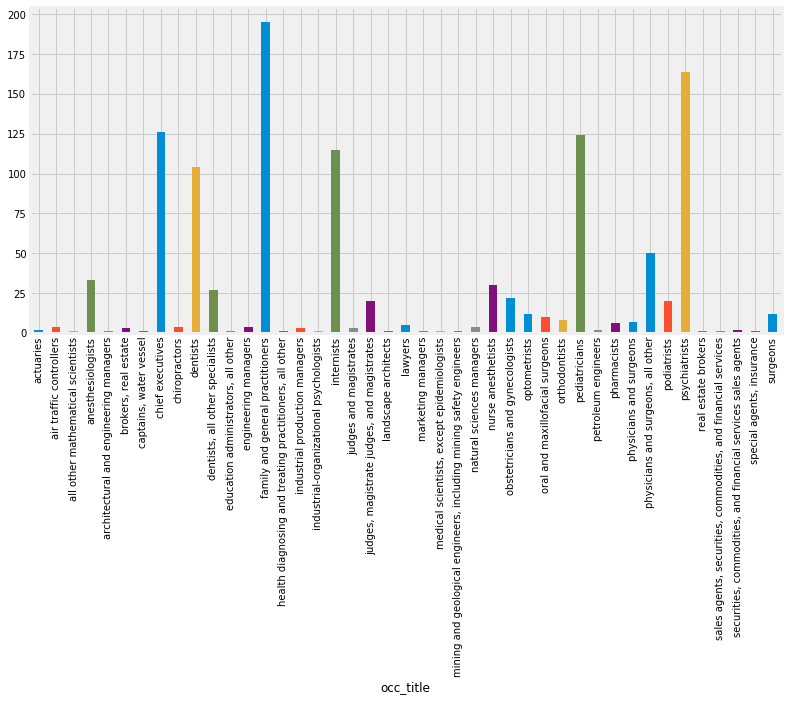

In [16]:
#Get the occupation with highest median hourly wage for each state, year, then plot all results
df_all_cl.occ_title=df_all_cl['occ_title'].str.replace(', general','') #remove 'general' which is only there for certain years
dfTopOccs = df_all_cl.groupby(['state','date']).apply(get_max_emp)
dfTopOccs.groupby('occ_title').size().plot(kind='bar', figsize=(12, 6), fontsize=10)

In [17]:
#Let's look at the top-paid occupations by year to see how these evolved over time
dfsub2018=dfTopOccs[dfTopOccs.date == '2018-05-01']
dfsub1998=dfTopOccs[dfTopOccs.date == '1998-05-01']
dfsub2003=dfTopOccs[dfTopOccs.date == '2003-05-01']
dfsub2008=dfTopOccs[dfTopOccs.date == '2008-05-01']

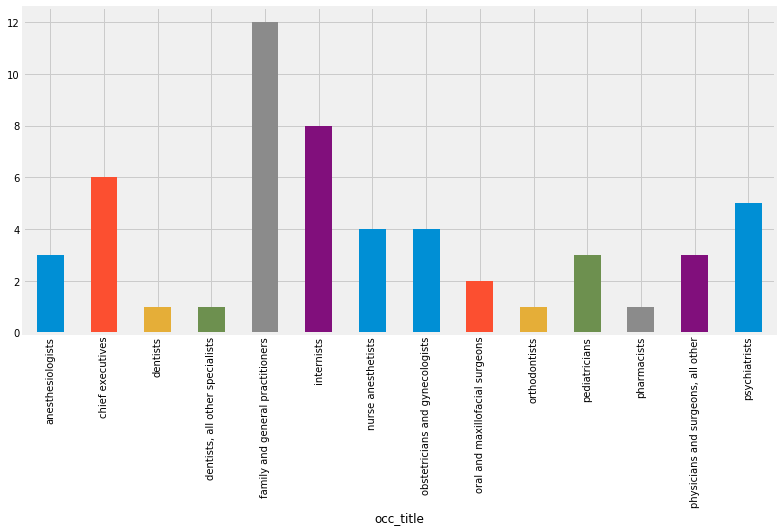

In [18]:
#Top-paid occupations in 2018
dfsub2018.groupby('occ_title').size().plot(kind='bar', figsize=(12, 6), fontsize=10)

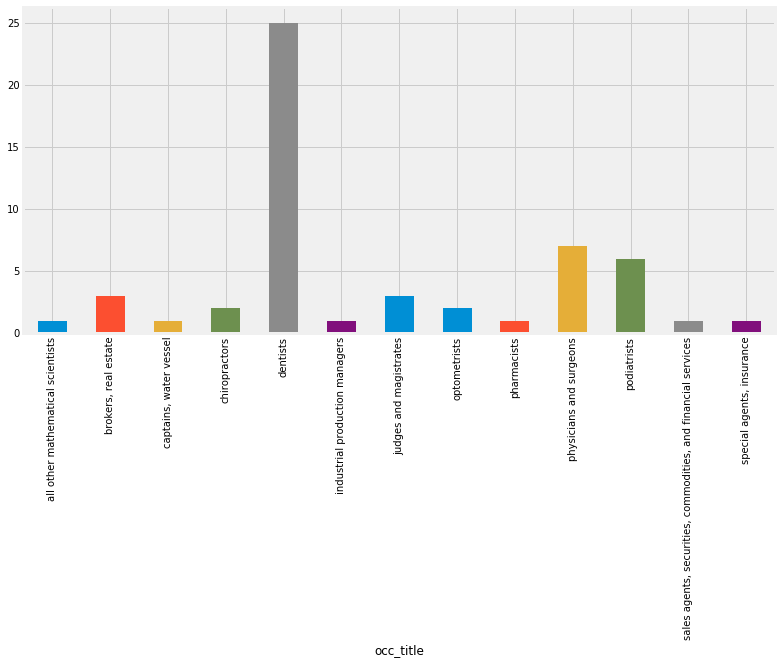

In [19]:
#Top-paid occupations in 1998
dfsub1998.groupby('occ_title').size().plot(kind='bar', figsize=(12, 6), fontsize=10)

In [20]:
#Let's adjust the data by inflation (i.e., consumer price index, or CPI)
#Import CPI data
df_cpi = pd.read_excel("CPI_index.xlsm") #save file to data frame

In [21]:
#Let's get a sense of what this file contains
df_cpi['Year'].describe()

count     237.000000
mean     2009.295359
std         5.719179
min      1999.000000
25%      2004.000000
50%      2009.000000
75%      2014.000000
max      2019.000000
Name: Year, dtype: float64

In [22]:
#Clean up, which will help when merging CPI data with labor data
df_cpi['Year']=pd.to_datetime(df_cpi['Label'].astype(str))
df_cpi=df_cpi.rename(columns={"Year": "date"})
df_cpi_abrv=df_cpi[['date','Value']]

In [23]:
#Check to make sure clean up worked as intended
df_cpi_abrv

,date,Value
0,1999-12-01,100.000
1,2000-01-01,100.300
2,2000-02-01,100.900
3,2000-03-01,101.600
4,2000-04-01,101.600
5,2000-05-01,101.700
6,2000-06-01,102.100
7,2000-07-01,102.300
8,2000-08-01,102.300
9,2000-09-01,102.800


In [24]:
#We're interested in the year only
dfcpiyear=df_cpi_abrv.groupby(df_cpi_abrv['date'].dt.year).mean() #Get the mean CPI for each year
dfcpiyear=dfcpiyear.reset_index()

In [25]:
#Check
dfcpiyear

,date,Value
0,1999,100.000000
1,2000,101.991667
2,2001,104.291667
3,2002,105.608333
4,2003,107.758333
5,2004,110.458333
6,2005,113.691667
7,2006,116.991667
8,2007,119.956750
9,2008,124.433167


In [26]:
#Some more re-formatting to match our other data
dfcpiyear.loc[:,'date'] = '5/1/'+ dfcpiyear.loc[:,'date'].astype(str)
dfcpiyear['date']=pd.to_datetime(dfcpiyear['date'],format='%m/%d/%Y')

In [27]:
#Merge CPI with labor data DF for all years
col_names=dfcpiyear.columns.intersection(df_all_cl.columns).tolist()
df_all_cl2=df_all_cl.merge(dfcpiyear,how='outer',on=col_names) #merge the DataFrames

In [28]:
#Unfortunately, we only have CPI data for 1999 onward, so we're going to work with this time frame only
df_99_18=df_all_cl2[df_all_cl2['date']>='1999']

In [29]:
#Check merged DataFrame, the "Value" column is the CPI for that year
df_99_18.iloc[-10:-5,:]

,area,st,state,occ_code,occ_title,occ_group,tot_emp,emp_prse,jobs_1000,loc_q,...,a_pct90,annual,hourly,date,loc quotient,year,release,one or three,year,Value
655800,78.0,VI,Virgin Islands,53-3032,"truck drivers, heavy and tractor-trailer",99999,330.0,15.7,99999.0,99999.0,...,33890.0,99999,99999,1999-05-01,99999.0,1999.0,99999.0,1,99999,100.0
655801,78.0,VI,Virgin Islands,53-3033,"truck drivers, light or delivery services",99999,250.0,15.4,99999.0,99999.0,...,24760.0,99999,99999,1999-05-01,99999.0,1999.0,99999.0,1,99999,100.0
655802,78.0,VI,Virgin Islands,53-5011,sailors and marine oilers,99999,99999.0,55.9,99999.0,99999.0,...,21420.0,99999,99999,1999-05-01,99999.0,1999.0,99999.0,3,99999,100.0
655803,78.0,VI,Virgin Islands,53-5021,"captains, mates, and pilots of water vessels",99999,180.0,37.5,99999.0,99999.0,...,62790.0,99999,99999,1999-05-01,99999.0,1999.0,99999.0,3,99999,100.0
655804,78.0,VI,Virgin Islands,53-6021,parking lot attendants,99999,30.0,34.3,99999.0,99999.0,...,17560.0,99999,99999,1999-05-01,99999.0,1999.0,99999.0,3,99999,100.0


In [30]:
#In the next few lines, we're going to calculate the total employment for each state
#The goal is to obtain the employment proportions for each occupation (by state and year)
#But for some of the occupations, the total employment is missing, so we're going to remove those occupations
#Cells with missing values have previously been assigned "99999"
df_99_18=df_99_18[df_99_18.tot_emp != 99999]

In [31]:
#Another clean-up step: remove any occupation group that is a "major" cateogry, so we aren't
#double-counting total employment
df_99_18=df_99_18[df_99_18.occ_group != "major"]

In [32]:
#Clean-up step so we are not double-counting total employment
df_99_18=df_99_18[df_99_18.occ_title != "all occupations"]

In [33]:
#Check to make sure the clean-up was successul; check Alabama
df_99_18[df_99_18.state == 'Alabama']

,area,st,state,occ_code,occ_title,occ_group,tot_emp,emp_prse,jobs_1000,loc_q,...,a_pct90,annual,hourly,date,loc quotient,year,release,one or three,year,Value
2,1.0,AL,Alabama,11-1011,chief executives,detailed,1390.0,5.6,0.716,0.53,...,99999.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
3,1.0,AL,Alabama,11-1021,general and operations managers,detailed,28600.0,1.8,14.712,0.93,...,99999.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
4,1.0,AL,Alabama,11-2011,advertising and promotions managers,detailed,50.0,20.7,0.028,0.16,...,167090.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
5,1.0,AL,Alabama,11-2021,marketing managers,detailed,770.0,6.3,0.394,0.24,...,196780.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
6,1.0,AL,Alabama,11-2022,sales managers,detailed,2390.0,4.8,1.230,0.47,...,193580.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
7,1.0,AL,Alabama,11-2031,public relations and fundraising managers,detailed,510.0,10.2,0.263,0.53,...,150640.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
8,1.0,AL,Alabama,11-3011,administrative services managers,detailed,750.0,7.1,0.384,0.20,...,142050.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
9,1.0,AL,Alabama,11-3021,computer and information systems managers,detailed,3200.0,4.0,1.646,0.61,...,183650.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
10,1.0,AL,Alabama,11-3031,financial managers,detailed,4910.0,2.5,2.526,0.60,...,207580.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583
11,1.0,AL,Alabama,11-3051,industrial production managers,detailed,3530.0,4.0,1.817,1.45,...,158150.0,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583


In [34]:
#Final step: get total employment for each state (by year)
df_tot_emp=df_99_18.groupby(['date','state'])['tot_emp'].sum()

In [35]:
#Make dataframe of total employment by date and state
df_tot_emp=df_tot_emp.reset_index(name='tot_emp_ds')

In [36]:
#Check to make sure the numbers look reasonable
df_tot_emp.head()

,date,state,tot_emp_ds
0,1999-05-01,Alabama,1622880.0
1,1999-05-01,Alaska,197600.0
2,1999-05-01,Arizona,1889190.0
3,1999-05-01,Arkansas,979240.0
4,1999-05-01,California,12222810.0


In [37]:
#Merge total employment with main DF
col_names=df_99_18.columns.intersection(df_tot_emp.columns).tolist()
df_99_18=df_99_18.merge(df_tot_emp,how='outer',on=col_names) #merge the DataFrames

In [38]:
#Check
df_99_18.head()

,area,st,state,occ_code,occ_title,occ_group,tot_emp,emp_prse,jobs_1000,loc_q,...,annual,hourly,date,loc quotient,year,release,one or three,year,Value,tot_emp_ds
0,1.0,AL,Alabama,11-1011,chief executives,detailed,1390.0,5.6,0.716,0.53,...,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583,1838390.0
1,1.0,AL,Alabama,11-1021,general and operations managers,detailed,28600.0,1.8,14.712,0.93,...,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583,1838390.0
2,1.0,AL,Alabama,11-2011,advertising and promotions managers,detailed,50.0,20.7,0.028,0.16,...,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583,1838390.0
3,1.0,AL,Alabama,11-2021,marketing managers,detailed,770.0,6.3,0.394,0.24,...,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583,1838390.0
4,1.0,AL,Alabama,11-2022,sales managers,detailed,2390.0,4.8,1.230,0.47,...,99999,99999,2018-05-01,NaN,NaN,NaN,NaN,NaN,141.850583,1838390.0


In [39]:
#Calculation of employment proportion out of 1000 by using the total employment by occupation
#and the newly calculated total employment for the entire state (by date)
df_99_18.loc[:,'emp_prop']=1000*df_99_18['tot_emp']/df_99_18['tot_emp_ds']

In [40]:
#Assign year based on date
df_99_18['year']=df_99_18['date'].dt.year

In [41]:
#Remove the old date column (not all years have it anyway)
df_99_18=df_99_18.drop(columns=['year ']) #clean-up step

In [42]:
#Check our dataframe to make sure all steps were implemented accurately
#Note for 2009-2018, jobs per 1000 is already reported; these values should agree 
#relatively well with the calculated emp_prop
df_99_18.head()

,area,st,state,occ_code,occ_title,occ_group,tot_emp,emp_prse,jobs_1000,loc_q,...,annual,hourly,date,loc quotient,year,release,one or three,Value,tot_emp_ds,emp_prop
0,1.0,AL,Alabama,11-1011,chief executives,detailed,1390.0,5.6,0.716,0.53,...,99999,99999,2018-05-01,NaN,2018,NaN,NaN,141.850583,1838390.0,0.756096
1,1.0,AL,Alabama,11-1021,general and operations managers,detailed,28600.0,1.8,14.712,0.93,...,99999,99999,2018-05-01,NaN,2018,NaN,NaN,141.850583,1838390.0,15.557091
2,1.0,AL,Alabama,11-2011,advertising and promotions managers,detailed,50.0,20.7,0.028,0.16,...,99999,99999,2018-05-01,NaN,2018,NaN,NaN,141.850583,1838390.0,0.027198
3,1.0,AL,Alabama,11-2021,marketing managers,detailed,770.0,6.3,0.394,0.24,...,99999,99999,2018-05-01,NaN,2018,NaN,NaN,141.850583,1838390.0,0.418845
4,1.0,AL,Alabama,11-2022,sales managers,detailed,2390.0,4.8,1.230,0.47,...,99999,99999,2018-05-01,NaN,2018,NaN,NaN,141.850583,1838390.0,1.300051


In [43]:
#Set so that employment proportion is the same as jobs_1000 
#(more accurate) for the years that have it
#Implement for 2009-2018
df_99_18.loc[df_99_18['year'] >= 2009,'emp_prop']=df_99_18[df_99_18['year']>=2009]['jobs_1000']

In [44]:
#Adjust for inflation by dividing by the CPI value; then weight by the employment prop
df_99_18.loc[:,'h_median_norm']=100*df_99_18['h_median']/df_99_18['Value']*df_99_18['emp_prop']/1000
df_99_18.loc[:,'h_median_inf']=100*df_99_18['h_median']/df_99_18['Value']

In [45]:
#Group by date and state, obtain the mean wage by summing the adjusted wages (h_median_norm)
#which had been adjusted for infl and weighted by total proportion
df_wage=df_99_18.groupby(['date','state'])['h_median_norm'].sum().unstack()

In [46]:
#Check: This is the weighted mean (weighted by emp proportion) 
#adjusted-for-inflation median wage, by state and year 
df_wage

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
1999-05-01,11.938636,15.984656,12.862397,10.846262,15.129332,14.245829,16.171066,13.991894,19.299937,12.291887,...,12.303777,13.120470,12.503612,12.486849,9.988051,13.643132,14.965939,11.187562,13.032689,12.297693
2000-05-01,12.227805,16.703659,13.421623,11.055508,15.585859,15.094688,16.569320,14.913476,20.590749,12.750990,...,12.458213,13.472204,12.982706,12.799774,10.421433,14.323358,15.906326,11.300739,13.506707,12.028582
2001-05-01,12.268240,16.756161,13.508684,11.273680,15.844058,15.301395,17.051464,15.023415,20.914663,12.925036,...,12.677830,13.563936,13.212314,13.312360,10.592918,14.483490,16.097937,11.555725,13.743872,12.540285
2002-05-01,12.533660,16.892948,13.629603,11.492937,15.881304,15.361807,17.206946,14.980625,21.906170,13.049558,...,12.775657,13.618065,13.267652,13.316093,10.491719,14.578850,15.959511,11.764058,13.717065,12.636440
2003-05-01,12.549715,16.614616,13.458871,11.454569,15.987188,15.469098,17.289058,14.863438,21.946177,12.707523,...,12.709938,13.599096,13.248329,13.252442,10.333091,14.651762,16.003411,11.697567,13.845534,12.609800
2004-05-01,12.600981,16.709869,13.616104,11.571103,16.311452,15.809496,17.380083,15.162228,23.658174,12.909183,...,12.921024,13.635851,13.364148,13.655159,10.484289,15.205274,16.257729,11.760786,13.745617,12.810940
2005-05-01,12.545518,16.644934,13.520058,11.459593,16.290529,15.673521,17.435023,14.867080,23.822380,12.935984,...,12.793927,13.493899,13.396479,13.649035,10.875492,15.259100,16.081004,11.526950,13.854004,12.689299
2006-05-01,12.641209,16.646512,13.735762,11.562245,16.402248,15.668604,17.256372,15.591040,24.410611,13.099111,...,12.840031,13.473895,13.306010,13.676028,11.233842,15.538829,16.195458,11.535322,13.807770,12.906853
2007-05-01,12.797991,17.039533,13.670785,11.854623,16.637609,15.763837,17.203194,15.903822,24.827461,13.302070,...,12.873909,13.708017,13.562870,13.951238,11.431473,15.680059,16.662734,11.577344,13.865107,13.151906


In [47]:
#Let's plot a subset of the adjusted mean weight
dfsub=df_99_18[df_99_18.state.isin(['Illinois','New York','Alabama','District of Columbia','California','Michigan'])]

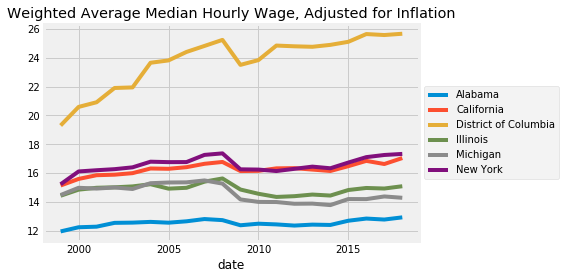

In [48]:
df_wage_sub=dfsub.groupby(['date','state'])['h_median_norm'].sum().unstack()
ax_weightavg=df_wage_sub.plot(title="Weighted Average Median Hourly Wage, Adjusted for Inflation")
ax_weightavg.legend(bbox_to_anchor=(1, 0.5), loc='center left')

In [49]:
#Sort values based on their total employment proportion
df_emp_list=df_99_18.groupby(['occ_title'])['emp_prop'].sum().sort_values(ascending=False)

In [50]:
#Take a look at the occupations that have the highest number of jobs
df_emp_list=df_emp_list.reset_index()
df_emp_list['occ_title'][0:5]

0                                  retail salespersons
1                                             cashiers
2                                        office clerks
3    combined food preparation and serving workers,...
4                               waiters and waitresses
Name: occ_title, dtype: object

In [51]:
#Sort values based on the highest median wage (adjusted for inflation) 
df_hwage=df_99_18.groupby(['occ_title'])['h_median_inf'].mean().sort_values(ascending=False).reset_index()
df_top=df_hwage['occ_title'][0:5] #Top earners
df_bottom=df_hwage['occ_title'][len(df_hwage)-5:len(df_hwage)] #Bottom earners

In [52]:
#Create a DF of the top5 and bottom5 occupations 
df_top_bottom=list(df_top)+list(df_bottom)
df_top_bottom

['family and general practitioners',
 'internists',
 'psychiatrists',
 'nurse anesthetists',
 'pediatricians',
 'cooks, fast food',
 'ushers, lobby attendants, and ticket takers',
 'dining room and cafeteria attendants and bartender helpers',
 'waiters and waitresses',
 'combined food preparation and serving workers, including fast food']

In [53]:
#Sort values based on the highest median wage (adjusted for inflation)
df_99_18.groupby(['occ_title'])['h_median_inf'].mean().sort_values(ascending=False)

occ_title
family and general practitioners                                             57.659457
internists                                                                   56.677518
psychiatrists                                                                56.408865
nurse anesthetists                                                           55.601273
pediatricians                                                                55.414583
obstetricians and gynecologists                                              54.392877
oral and maxillofacial surgeons                                              53.846394
physicians and surgeons, all other                                           53.632049
orthodontists                                                                52.986201
anesthesiologists                                                            52.684220
dentists, all other specialists                                              51.634962
dentists                         

In [54]:
#Create a sub DF that contains the top5 and bottom5 earners
df_sub_occ=df_99_18[df_99_18.occ_title.isin(df_top_bottom)]

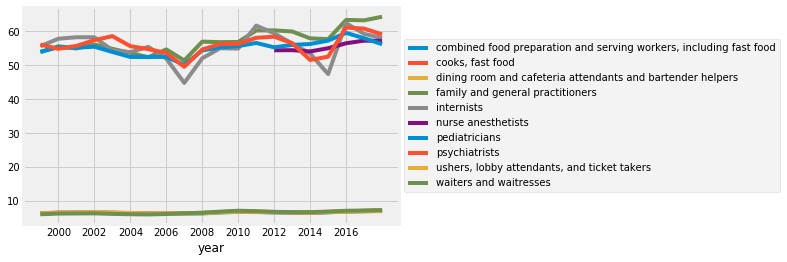

In [55]:
#Plot wages (adjusted for inflation) for top5 and bottom5
df_Hs=df_sub_occ.groupby(['year','occ_title'])['h_median_inf'].mean()
ax=df_Hs.unstack().plot()
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
ax.xaxis.set_ticks(np.arange(2000,2018,2))
plt.rcParams.update({'font.size': 10})

In [56]:
#Instead of looking at top5 and bottom5 occupations, let's look at the top 90%
Sorted_h_median=df_99_18.groupby(['occ_title'])['h_median_inf'].mean().sort_values(ascending=False)
df_top10pt=Sorted_h_median.quantile(0.90)
df_top10pt
df_top10=Sorted_h_median[Sorted_h_median>=df_top10pt]
df_top10

occ_title
family and general practitioners                                              57.659457
internists                                                                    56.677518
psychiatrists                                                                 56.408865
nurse anesthetists                                                            55.601273
pediatricians                                                                 55.414583
obstetricians and gynecologists                                               54.392877
oral and maxillofacial surgeons                                               53.846394
physicians and surgeons, all other                                            53.632049
orthodontists                                                                 52.986201
anesthesiologists                                                             52.684220
dentists, all other specialists                                               51.634962
dentists              

In [57]:
#Instead of looking at top5 and bottom5 occupations, let's look at the bottom 10%
df_bottom10pt=Sorted_h_median.quantile(0.1)
df_bottom10pt
df_bottom10=Sorted_h_median[Sorted_h_median<=df_bottom10pt]
df_bottomemp_list=df_bottom10.reset_index()
list(df_bottomemp_list['occ_title'])

['tellers',
 'cooks, all other',
 'demonstrators and product promoters',
 'shoe machine operators and tenders',
 'couriers and messengers',
 'laborers and freight, stock, and material movers, hand',
 'nursing aides, orderlies, and attendants',
 'photographic process workers and processing machine operators',
 'landscaping and groundskeeping workers',
 'bicycle repairers',
 'cooks, institution and cafeteria',
 'bakers',
 'slaughterers and meat packers',
 'security guards',
 'floral designers',
 'driver/sales workers',
 'shoe and leather workers and repairers',
 'tire repairers and changers',
 'gaming service workers, all other',
 'helpers--production workers',
 'food processing workers, all other',
 'farmworkers, farm, ranch, and aquacultural animals',
 'meat, poultry, and fish cutters and trimmers',
 'funeral attendants',
 'tour and travel guides',
 'library assistants, clerical',
 'telemarketers',
 'crossing guards',
 'hairdressers, hairstylists, and cosmetologists',
 'transportation 

In [58]:
#List of all occupations that are in the top 10 percentile of (median hourly wage, adj for inflation)
df_topemp_list=df_top10.reset_index()
list(df_topemp_list['occ_title'])

['family and general practitioners',
 'internists',
 'psychiatrists',
 'nurse anesthetists',
 'pediatricians',
 'obstetricians and gynecologists',
 'oral and maxillofacial surgeons',
 'physicians and surgeons, all other',
 'orthodontists',
 'anesthesiologists',
 'dentists, all other specialists',
 'dentists',
 'surgeons',
 'chief executives',
 'podiatrists',
 'architectural and engineering managers',
 'engineering managers',
 'pharmacists',
 'nuclear engineers',
 'air traffic controllers',
 'astronomers',
 'computer and information systems managers',
 'physicists',
 'natural sciences managers',
 'petroleum engineers',
 'optometrists',
 'computer and information research scientists',
 'lawyers',
 'marketing managers',
 'judges, magistrate judges, and magistrates',
 'aerospace engineers',
 'mathematicians',
 'computer and information scientists, research',
 'sales managers',
 'financial managers',
 'nurse practitioners',
 'nurse midwives',
 'human resources managers, all other',
 'comput

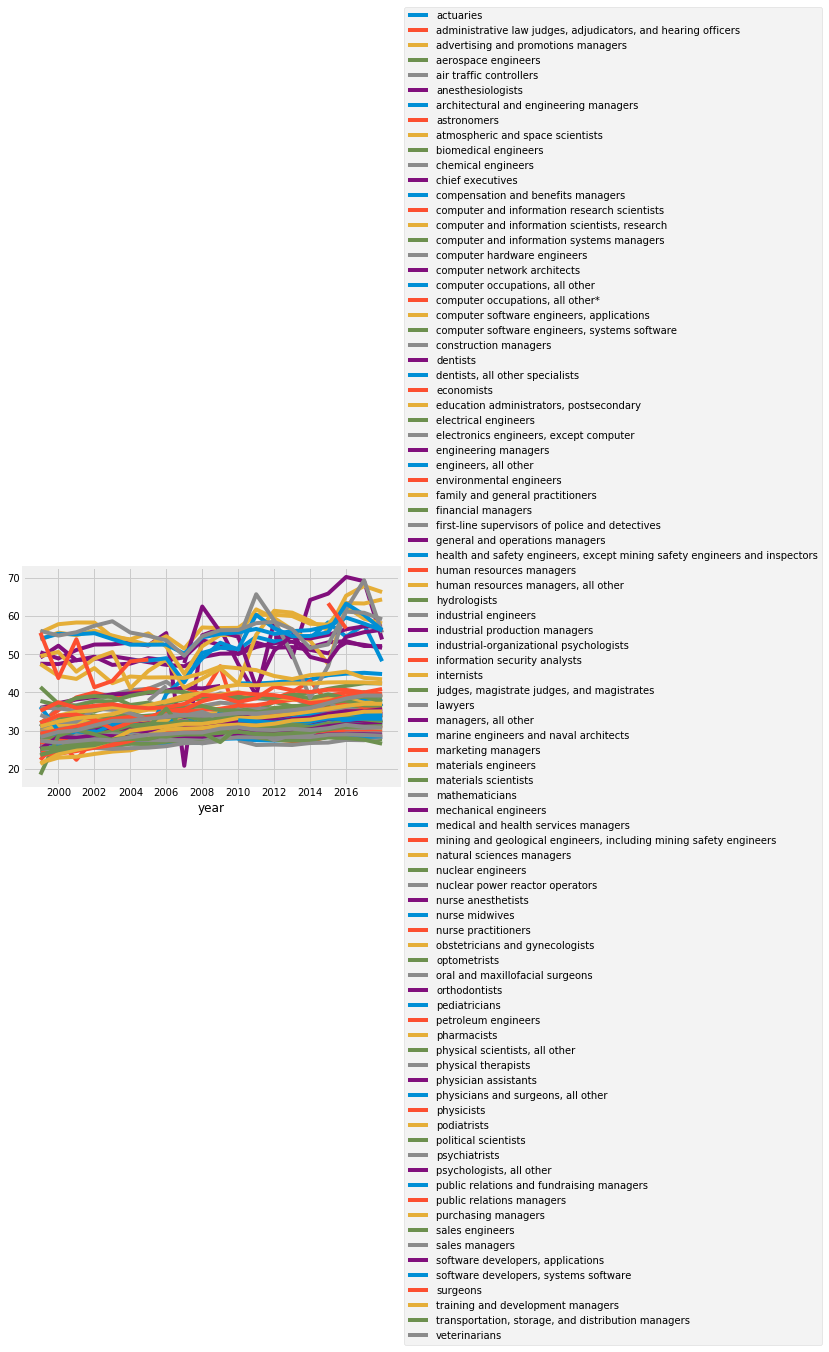

In [59]:
#Wage over time for occupations that are in the top 10 percentile
df_sub_occ=df_99_18[df_99_18.occ_title.isin(list(df_topemp_list['occ_title']))]
df_Hs=df_sub_occ.groupby(['year','occ_title'])['h_median_inf'].mean()
ax=df_Hs.unstack().plot()
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
ax.xaxis.set_ticks(np.arange(2000,2018,2))

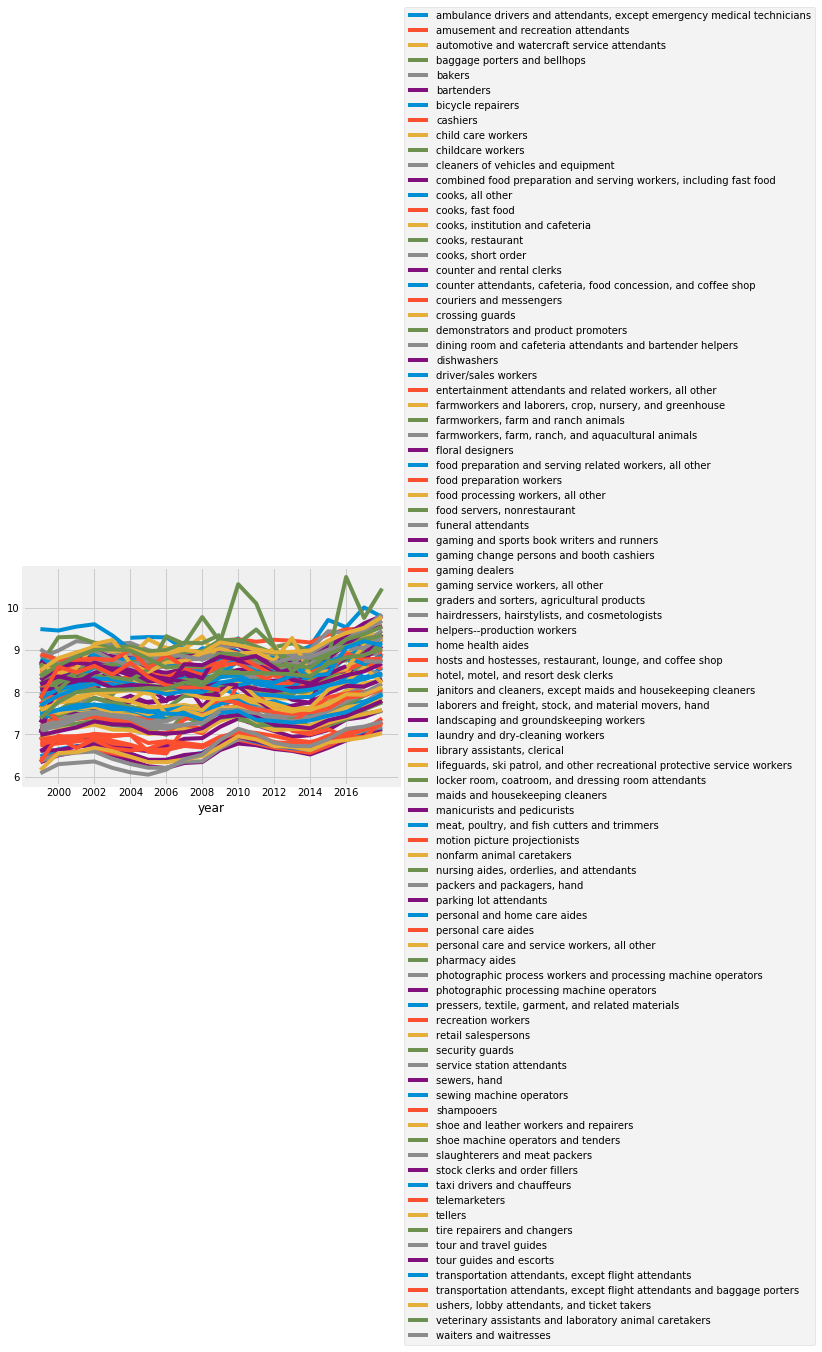

In [60]:
#Wage over time for occupations that are in the bottom 10 percentile
df_sub_occ2=df_99_18[df_99_18.occ_title.isin(list(df_bottomemp_list['occ_title']))]
df_Hs=df_sub_occ2.groupby(['year','occ_title'])['h_median_inf'].mean()
ax=df_Hs.unstack().plot()
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
ax.xaxis.set_ticks(np.arange(2000,2018,2))

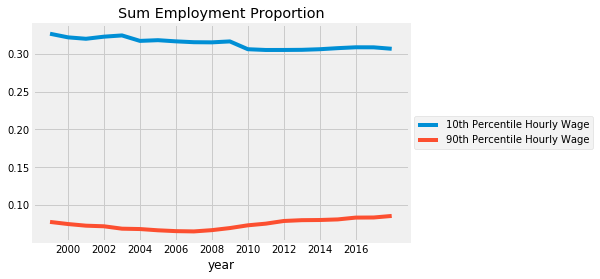

In [61]:
# Bottom 10 percentile
df_sub_occ2=df_99_18[df_99_18.occ_title.isin(list(df_bottomemp_list['occ_title']))]
df_Hs=df_sub_occ2.groupby('year')['emp_prop'].sum()/df_99_18.groupby('year')['emp_prop'].sum()
ax=df_Hs.plot()
ax.xaxis.set_ticks(np.arange(2000,2018,2))

# Top 10 percentile
df_sub_occ=df_99_18[df_99_18.occ_title.isin(list(df_topemp_list['occ_title']))]
df_HsT=df_sub_occ.groupby('year')['emp_prop'].sum()/df_99_18.groupby('year')['emp_prop'].sum()
axT=df_HsT.plot(title='Sum Employment Proportion')

axT.legend(['10th Percentile Hourly Wage','90th Percentile Hourly Wage'], bbox_to_anchor=(1, 0.5), loc='center left')
axT.xaxis.set_ticks(np.arange(2000,2018,2))
plt.rcParams.update({'font.size': 14})

In [62]:
#Run K-Means clustering by year on the hourly wages to understand the wage categories/clusters
K=5 #Five categories of hourly median
init_test=10
centroids=np.zeros(shape=(K,20)) #save centroids for each year
count=0
for x in range(1999,2019): #Loop through each year
    Xdata=df_99_18[df_99_18['year'] == x]['h_median_inf'].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init = init_test, max_iter = 20).fit(Xdata)
    
    #Re-sort and keep track of labels
    centroids_unsort = np.round(kmeans.cluster_centers_.reshape(K), decimals=4) #unsorted centroids
    a=np.append(centroids_unsort, range(K),axis=0).reshape(2,K) #assign unsorted centroids a number
    a=np.transpose(a)
    dfa=pd.DataFrame(a)
    ab=dfa=dfa.sort_values(by = 0) #sort based on centroid value

    #Save centroids
    centroids[:,count] = np.round(np.sort(kmeans.cluster_centers_.reshape(K)), decimals=4) 
    count=count+1
    
    #Save centroid labels for each h_median
    kmeansValue=np.zeros(shape=kmeans.labels_.shape)
    
    for y in range(len(kmeans.labels_)):
        kmeansValue[y]=np.where(ab==centroids_unsort[kmeans.labels_[y]])[0][0]
        #kmeansValue[y]=centroids_unsort[kmeans.labels_[y]]
    df_99_18.loc[df_99_18['year'] == x,'h_cluster']=kmeansValue

Text(0.5, 1.0, 'Hourly Wage Centroids')

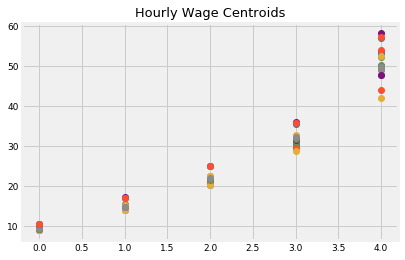

In [70]:
#Visualize all of the centroids (this is for all years)
plt.plot(centroids,'o')
plt.title('Hourly Wage Centroids')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002252E44CD68>],
      dtype=object)

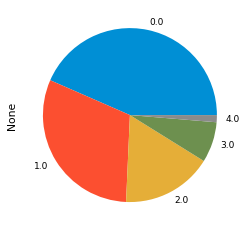

In [71]:
#Visualize the proportion of wages in each cluster; 0 is the lowest age group and 4 is the highest
df_18=df_99_18[df_99_18.year == 2018]
df_18.groupby(['h_cluster']).size().plot.pie(subplots=True, figsize=(50,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022525373AC8>],
      dtype=object)

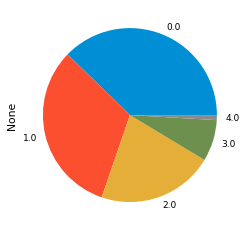

In [72]:
df_99=df_99_18[df_99_18.year == 1999]
df_99.groupby(['h_cluster']).size().plot.pie(subplots=True, figsize=(50,4))

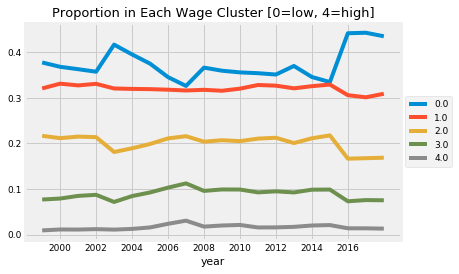

In [73]:
#Visualize how the proportion in each wage cluster changes over time
df_clusters=df_99_18.groupby(['year','h_cluster']).size().unstack()
df_clusters["sum"] = df_clusters.sum(axis=1) #Find the sum in each wage group by year
cplot=df_clusters.iloc[:,0:5].div(df_clusters["sum"], axis=0).plot() #Divide by sum to get prop.
cplot.xaxis.set_ticks(np.arange(2000,2018,2))
cplot.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('Proportion in Each Wage Cluster [0=low, 4=high]')
plt.rcParams.update({'font.size': 9})